In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data.csv',on_bad_lines='warn')

Skipping line 4644: expected 2 fields, saw 5
Skipping line 7174: expected 2 fields, saw 5
Skipping line 11223: expected 2 fields, saw 5
Skipping line 13812: expected 2 fields, saw 5
Skipping line 14135: expected 2 fields, saw 5
Skipping line 14296: expected 2 fields, saw 5
Skipping line 14868: expected 2 fields, saw 5
Skipping line 17422: expected 2 fields, saw 5
Skipping line 22804: expected 2 fields, saw 5
Skipping line 25004: expected 2 fields, saw 5
Skipping line 26606: expected 2 fields, saw 5
Skipping line 26745: expected 2 fields, saw 5
Skipping line 29705: expected 2 fields, saw 5
Skipping line 32770: expected 2 fields, saw 5
Skipping line 32881: expected 2 fields, saw 5
Skipping line 35646: expected 2 fields, saw 5
Skipping line 36553: expected 2 fields, saw 5
Skipping line 38735: expected 2 fields, saw 5
Skipping line 40570: expected 2 fields, saw 5
Skipping line 40579: expected 2 fields, saw 5
Skipping line 41867: expected 2 fields, saw 5
Skipping line 46864: expected 2 fiel

In [3]:
#data description
df.describe
df['strength'].unique()

array([1, 2, 0], dtype=int64)

In [4]:
print('number of null rows',df.isnull().sum())
df.dropna(inplace=True)
print('number of null rows after deletion',df.isnull().sum())

number of null rows password    1
strength    0
dtype: int64
number of null rows after deletion password    0
strength    0
dtype: int64


visualise the strength distrubtion

In [5]:
import seaborn as sns


<Axes: xlabel='strength', ylabel='count'>

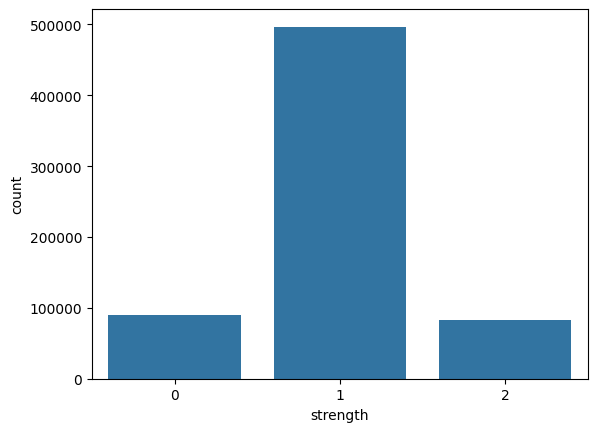

In [6]:
sns.countplot(x='strength',data=df)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Example dataset of passwords
passwords = df['password']

# Initialize CountVectorizer
vectorizer = CountVectorizer(analyzer='char')

# Fit and transform the passwords
X = vectorizer.fit_transform(passwords)

# Convert the transformed data to an array
tokenized_passwords = X.toarray()

print(tokenized_passwords[0])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


lets normalize data

In [8]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)

# Convert the transformed data to an array
normalized_tokenized_passwords = X_tfidf.toarray()
print(normalized_tokenized_passwords[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.56689871 0.         0.59130282
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.28563206
 0.22168931 0.         0.         0.         0.         0.
 0.29224738 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.33592629 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(normalized_tokenized_passwords,df['strength'],
                                               random_state=42,train_size=0.7)

In [10]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

evaluation

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:

cv_scores = cross_val_score(model1, x_train, y_train, cv=2, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.81778347 0.81914027]
Mean CV score: 0.8184618666666666


In [13]:
cv_scores = cross_val_score(model1, x_test, y_test, cv=2, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.81798361 0.81901718]
Mean CV score: 0.8185003983054913


In [14]:
from sklearn.metrics import accuracy_score

y_pred = model1.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8200186168756503


In [21]:
def predict_password_classes(raw_passwords, vectorizer, transformer, model):
    # Tokenize raw passwords
    tokenized_passwords = vectorizer.transform(raw_passwords)
    
    # Normalize token counts using TF-IDF
    normalized_tokenized_passwords = transformer.transform(tokenized_passwords)

    # Predict classes
    predicted_classes = model.predict(normalized_tokenized_passwords)
   
    
    return predicted_classes

In [20]:
raw_passwords = ['mehdismi','AVYq1lDE4MgAZfNt','lamborghin1','SZD1111AZR285T30Z#[`|\|FLZ TADDDDDDDDDDDDDDDDS 2T', 'securepasswasassord', 'weakpass', 'strongpassword']


# Predict classes for all passwords
predicted_classes = predict_password_classes(raw_passwords, vectorizer,tfidf_transformer , model1)

print("Predicted classes:", predicted_classes)

  (0, 74)	0.29297324349986054
  (0, 68)	0.5958890287751029
  (0, 64)	0.5202868202500205
  (0, 63)	0.3456849681692685
  (0, 60)	0.2519715585530849
  (0, 59)	0.3246487411263137
Predicted classes: [0 2 1 1 1 0 1]


saving the model

In [24]:
from joblib import dump

# Assuming your trained model is named model1
# Save the model to a file
dump(model1, 'trained_model.joblib')
dump(vectorizer, 'vectorizer.joblib')
dump(tfidf_transformer, 'transformer.joblib')


['transformer.joblib']

In [23]:
from joblib import load

# Load the saved model from the file
loaded_model = load('trained_model.joblib')

# Now you can use loaded_model for making predictions
predicted_classes = predict_password_classes(raw_passwords, vectorizer,tfidf_transformer , loaded_model)

print("Predicted classes:", predicted_classes)


Predicted classes: [0 2 1 1 1 0 1]
